In [1]:
import pandas as pd
import seaborn as sb

/Applications/anaconda_dist/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
df = pd.read_csv("rstate.csv")

In [42]:
df.head(5)

,area,rooms,floor,elev,parking,btype,price
0,232,11,12,0,2,2,2751000
1,249,11,5,1,2,1,4917000
2,225,10,12,1,2,2,2833000
3,51,2,7,0,2,1,2784000
4,192,9,3,0,0,2,2210000


In [15]:
df = pd.get_dummies(df , columns=['btype'])

In [16]:
df.head()

,area,rooms,floor,elev,parking,price,btype_1,btype_2,btype_3
0,232,11,12,0,2,2751000,0,1,0
1,249,11,5,1,2,4917000,1,0,0
2,225,10,12,1,2,2833000,0,1,0
3,51,2,7,0,2,2784000,1,0,0
4,192,9,3,0,0,2210000,0,1,0


In [17]:
X = df.drop(['price'],axis=1)

In [18]:
y = df.price

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33,random_state=42)

In [21]:
import sklearn.linear_model as slin
import sklearn.tree as st

In [22]:
model = slin.LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred = model.predict(X_test)

In [28]:
model.score(X_test,y_test)

0.9962304727240794

In [29]:
import sklearn.metrics as mt

In [30]:
mt.r2_score(y_test,y_pred)

0.9962304727240793

In [31]:
mt.mean_absolute_error(y_test,y_pred)

52473.05909947447

In [32]:
import numpy as np

In [33]:
np.sqrt(mt.mean_squared_error(y_test,y_pred))

65146.76908538865

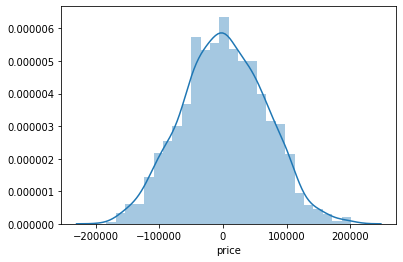

In [38]:
sb.distplot(y_test - y_pred)

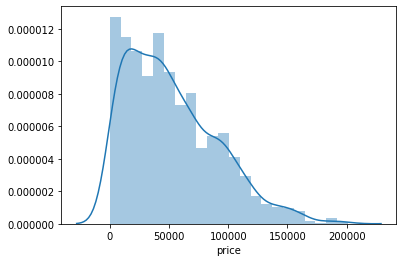

In [37]:
sb.distplot(np.abs(y_test - y_pred))

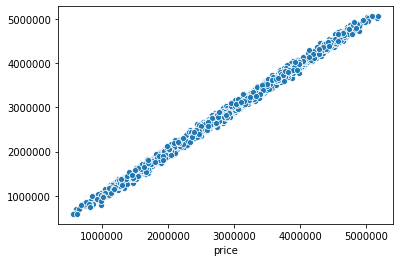

In [36]:
sb.scatterplot(y_test , y_pred)

In [34]:
df.head()

,area,rooms,floor,elev,parking,price,btype_1,btype_2,btype_3
0,232,11,12,0,2,2751000,0,1,0
1,249,11,5,1,2,4917000,1,0,0
2,225,10,12,1,2,2833000,0,1,0
3,51,2,7,0,2,2784000,1,0,0
4,192,9,3,0,0,2210000,0,1,0


In [35]:
model.coef_

array([   5022.68978154,   99880.83354158,   -1425.40003699,
        212925.70475129,   96124.74715567,  975720.64346154,
       -876576.39119332,  -99144.25226822])